# EEG data load - compare matlab load with raw data load

This notebook compares the EEG data of participant 2 loaded from the mat file and from raw data.   
It documents how to load and plot EEG data with python-MNE package.

Key things in this notebook:
- Data streams (fsr, joystick, event, video) are synced to the `.mat` eeg file
- `.mat` eeg file contains the information from raw file but cropped at first DIN
- `.mat` eeg file is sampled at 1000Hz, the unit of the data is microvolt ($\mu V$)
- raw eeg file is sampled at 1000Hz, and the unit of the data is volt ($V$)

In [4]:
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
import pandas as pd
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)


Bad key "text.kerning_factor" on line 4 in
/Users/Qianqian/anaconda3/envs/ml/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### Loading the `.mat` dataset

In [2]:
p2_eeg = loadmat('data/p2_eeg.mat')

In [7]:
p2_eeg_df = pd.DataFrame(p2_eeg['p2_eeg'])
p2_eeg_df = p2_eeg_df.rename(lambda x: x+1, axis='columns')
p2_eeg_df.insert(0, 'timestamp_ms', np.arange(p2_eeg_df.shape[0]))
p2_eeg_df = p2_eeg_df.drop(columns=[65])

In [8]:
p2_eeg_df

,timestamp_ms,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,-6435.210449,-8316.973633,492.944885,1404.833740,-7257.807129,-901.238464,242.817108,-15975.132812,-522.508850,...,2778.904541,-6184.883789,-6892.368652,-641.983337,-2425.445068,-7416.185547,-1701.274658,1147.051514,-1324.591309,-694.856873
1,1,-6457.062012,-8321.794922,487.974091,1402.181396,-7271.803223,-904.998535,241.029190,-15981.425781,-530.608887,...,2756.933350,-6152.960938,-6894.318359,-652.864868,-2429.531982,-7423.056641,-1721.613770,1133.590088,-1346.059448,-734.118591
2,2,-6440.391602,-8326.649414,489.753082,1404.613892,-7271.342773,-901.404419,240.730896,-15975.419922,-524.699890,...,2763.450195,-6145.101074,-6899.665039,-641.445435,-2436.177246,-7424.788086,-1703.821411,1148.293945,-1325.429199,-703.355774
3,3,-6439.343262,-8330.418945,493.173004,1405.103516,-7258.800293,-900.445007,239.473068,-15970.718750,-521.045288,...,2767.429932,-6185.363281,-6904.002930,-644.182678,-2437.245850,-7422.971680,-1695.515259,1154.135010,-1299.729004,-662.273743
4,4,-6443.694824,-8327.436523,497.058533,1406.041382,-7247.469238,-897.518188,241.212524,-15966.178711,-516.038940,...,2766.936768,-6165.060547,-6899.393066,-650.036438,-2432.305420,-7416.296875,-1700.826050,1148.333740,-1295.415161,-672.435730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732541,732541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
732542,732542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
732543,732543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
732544,732544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
p2_eeg_df.describe()

,timestamp_ms,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,...,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000,732546.000000
mean,366273.500000,-6970.380371,-7096.209961,-1312.599365,901.566895,-6251.694824,-1631.546875,-433.232178,-12796.830078,-440.148315,...,2435.988037,-6545.523926,-7165.724121,139.190994,-1429.257446,-6048.089844,-1568.878784,533.618042,-1369.959595,-951.443176
std,211467.959484,202.431778,506.453430,907.341919,368.180695,269.124725,563.384888,352.364014,1172.833496,210.625137,...,232.378586,316.112732,192.959152,535.067444,394.545319,549.087646,90.881180,840.589111,1147.946289,348.833496
min,1.000000,-7448.479492,-8393.937500,-2807.763672,0.000000,-7337.586426,-2799.997070,-990.052979,-15981.425781,-965.425293,...,0.000000,-7170.598145,-7487.439941,-1016.750000,-2580.632812,-7484.151367,-2031.075806,-997.390015,-2484.560303,-1793.774902
25%,183137.250000,-7103.266846,-7355.919800,-1950.794922,627.889771,-6334.893066,-2051.294922,-724.055786,-13483.396484,-555.563049,...,2282.615784,-6852.401733,-7308.070679,-317.946899,-1656.800293,-6392.267822,-1623.070679,-245.489990,-1816.243866,-1338.218048
50%,366273.500000,-6997.284668,-7038.612061,-1623.816284,920.567352,-6164.218262,-1598.031799,-562.612244,-12386.905762,-399.417130,...,2514.662231,-6478.832520,-7218.176270,260.269424,-1414.192505,-6025.980225,-1563.147461,299.556061,-1639.795349,-888.824463
75%,549409.750000,-6880.393555,-6777.212524,-524.405014,1248.382202,-6082.045776,-1086.904724,-146.506413,-11857.486084,-273.693481,...,2629.750000,-6290.560669,-7091.250366,653.453888,-1108.448029,-5526.928101,-1502.959595,1438.761658,-1491.839264,-669.232300
max,732546.000000,0.000000,0.000000,597.508728,1488.602905,0.000000,0.000000,260.037476,0.000000,0.000000,...,3059.329102,0.000000,0.000000,922.755371,0.000000,0.000000,0.000000,1985.749634,14399.700195,0.000000


Create MNE raw data object for participant 2 (following [this tutorial](https://mne.tools/stable/auto_tutorials/simulation/plot_creating_data_structures.html#sphx-glr-auto-tutorials-simulation-plot-creating-data-structures-py))

In [76]:
channel_names = [ 'E' + str(i+1) for i in range(64)]
sampling_rate = 1000
ch_types = 'eeg'
info = mne.create_info(channel_names, sampling_rate, ch_types)
p2_raw = mne.io.RawArray(p2_eeg_df.iloc[:,1:].transpose()/(10 ** 6), info)

Creating RawArray with float64 data, n_channels=64, n_times=732546
    Range : 0 ... 732545 =      0.000 ...   732.545 secs
Ready.


In [77]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>

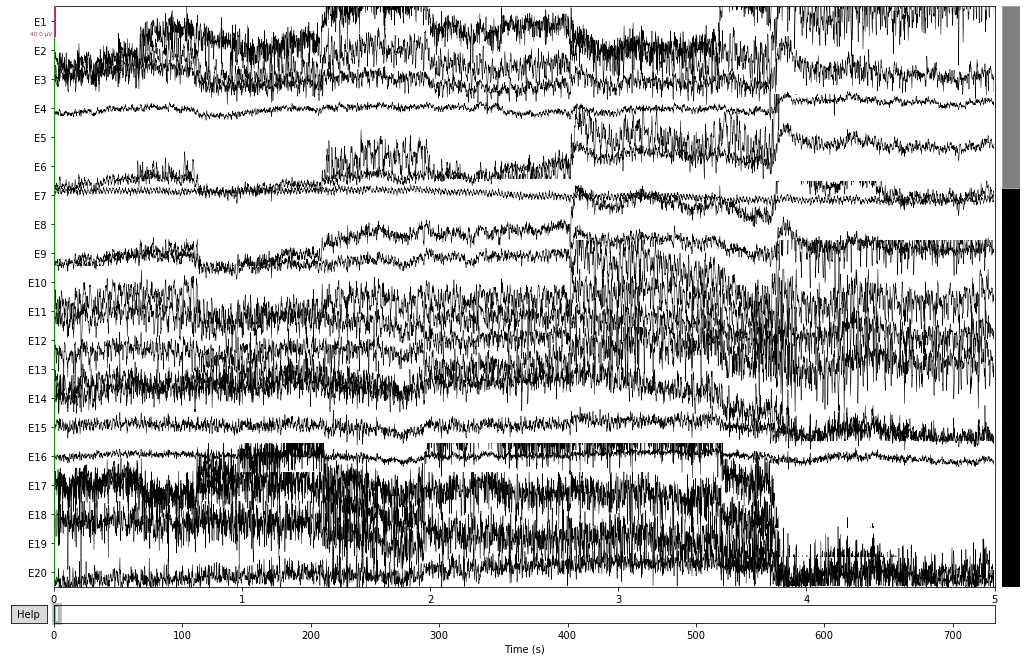

In [79]:
%matplotlib qt
p2_raw.plot(duration=5, n_channels=20)

### Loading the raw dataset

The file is downloaded from spin server at `ubc/cs/research/imager/project/spin/proj/eeg/raw%20data/July-20-2018-2/Jul-20-2018-2_20180720_113305.mat`

In [2]:
raw = mne.io.read_raw_egi('../../raw_eeg/2.mff', preload=True)

Reading EGI MFF Header from ../../raw_eeg/2.mff...


FileNotFoundError: [Errno 2] No such file or directory: '../../raw_eeg/2.mff'

In [11]:
from os import listdir
from os.path import join, isdir
path_to_raw_eeg = '../../converted_data'
eeg_filename = 'eeg.mat'
feeltrace_filename = 'feeltrace.mat'
eeg_mat = [join(path_to_raw_eeg, f, eeg_filename) for f in listdir(path_to_raw_eeg) if isdir(f) and f[0] != '.']
montage = mne.channels.make_standard_montage('GSN-HydroCel-65_1.0')

#         load eeg mat file
eeg_mat = "../../converted_data/2/eeg.mat"
eeg = loadmat(eeg_mat)
eeg = eeg['eeg']

#         create mne channel info
channel_names = [ 'E' + str(i+1) for i in range(64)] + ['Cz']
sampling_rate = 1000
ch_types = 'eeg'
info = mne.create_info(channel_names, sampling_rate, ch_types)

#         load eeg into mne package
raw = mne.io.RawArray(eeg.transpose()/(10 ** 6), info)
raw.set_montage(montage)
raw.set_channel_types({'E64': 'eog'})
raw.drop_channels('Cz')

Creating RawArray with float64 data, n_channels=65, n_times=732546
    Range : 0 ... 732545 =      0.000 ...   732.545 secs
Ready.


<RawArray | 64 x 732546 (732.5 s), ~357.9 MB, data loaded>

In [69]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 63 EEG, 1 EOG
 custom_ref_applied: False
 dig: 68 items (3 Cardinal, 65 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>

In [12]:
minute_data = raw.copy().crop(300, 360)

Effective window size : 2.048 (s)


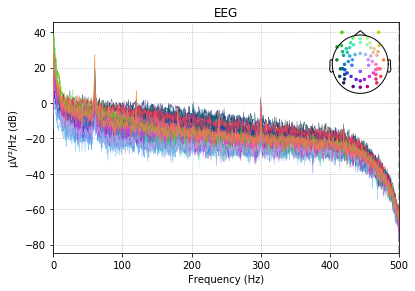

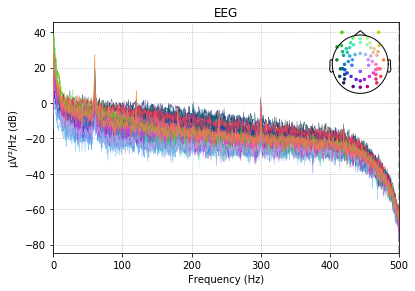

In [71]:
minute_data.plot_psd(area_mode='range', tmax=10.0, average=False) # power spectual density

In [13]:
minute_data.notch_filter(np.arange(60, 301, 60), filter_length='auto',phase='zero')

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



<RawArray | 64 x 60001 (60.0 s), ~29.5 MB, data loaded>

Effective window size : 2.048 (s)


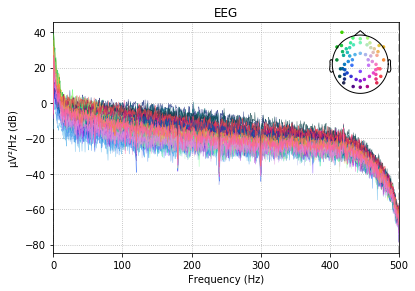

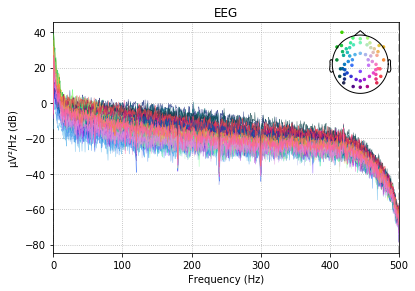

In [47]:
minute_data.plot_psd(area_mode='range', tmax=10.0, average=False) # power spectual density

In [20]:
minute_data.filter(1, None, picks=['eeg'])

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



<RawMff | signal1.bin, 66 x 60001 (60.0 s), ~30.3 MB, data loaded>

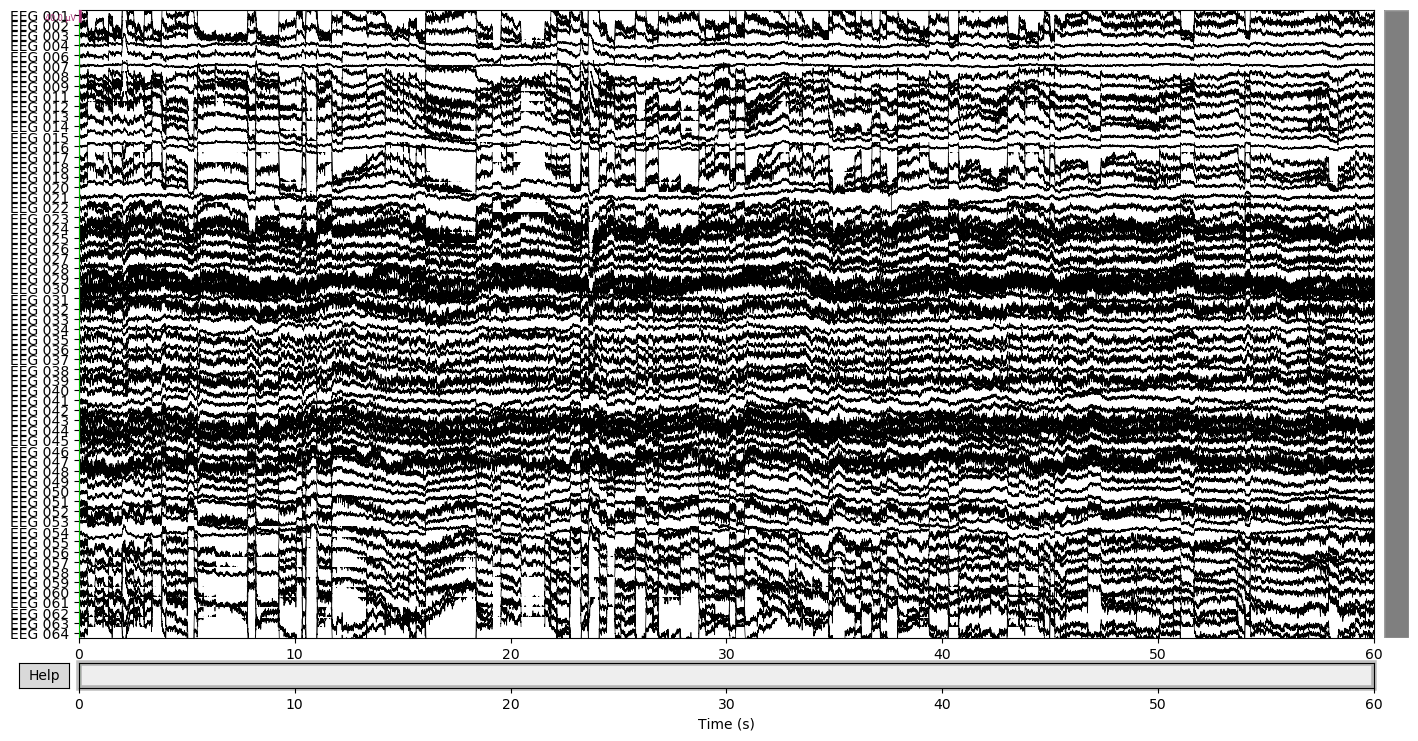

In [139]:
%matplotlib qt
eeg_channels = mne.pick_types(minute_data.info, eeg=True)
minute_data.plot(duration=60, order=eeg_channels, n_channels=len(eeg_channels),
         remove_dc=False)

In [14]:
eog_epochs = mne.preprocessing.create_eog_epochs(minute_data, baseline=(-0.5, -0.2))

EOG channel index for this subject is: [63]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 35 significant peaks
Number of EOG events detected : 35
Not setting metadata
Not setting metadata
35 matching events found
Applying baseline correction (mode: mean)
Loading data for 35 events and 1001 original time points ...
2 bad epochs dropped


Not setting metadata
Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


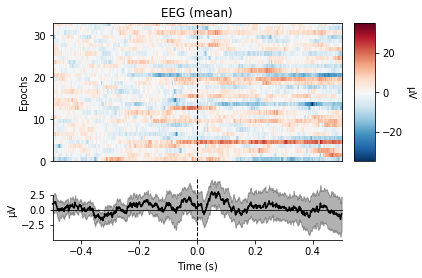

[<Figure size 432x288 with 3 Axes>]

In [15]:
# each row of the top heatmap represents a detected epoch, with the color indicating voltage of the average of all EEG channels
# the bottom chart is an average of all channels and all epochs
eog_epochs.plot_image(combine='mean')

No projector specified for this dataset. Please consider the method self.add_proj.


Text(0.5, 1, 'Averaged EOG epochs using E64')

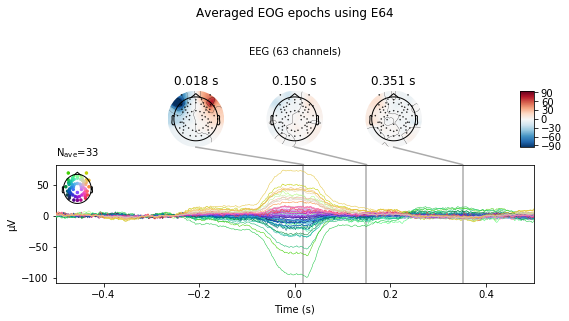

In [17]:
# the bottom chart shows an average over all epochs detected for each eeg channel
fig = eog_epochs.average().plot_joint(show=False)
plt.title('Averaged EOG epochs using E64')

In [125]:
import os
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


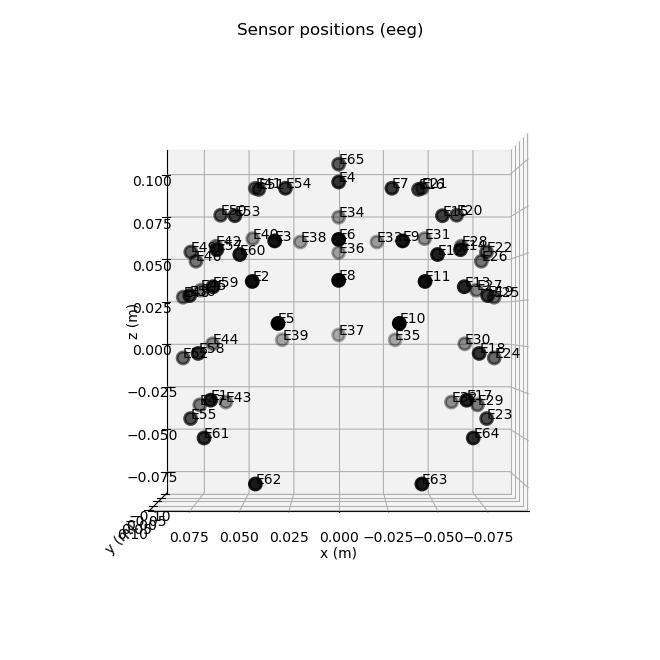

In [212]:
# ax3d = fig.add_subplot(122, projection='3d')
# raw.plot_sensors(show_names=True)
# raw.plot_sensors(ch_type='eeg', kind='3d', show_names=True)
mne.

In [25]:
minute_data.info

<Info | 7 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 63 EEG, 1 EOG, 2 STIM
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2018-07-20 18:33:05 UTC
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
>

In [45]:
ica = ICA(n_components=15)
ica.fit(minute_data)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components
Fitting ICA took 1.2s.


<ICA | raw data decomposition, fit (fastica): 60001 samples, 15 components, channels used: "eeg">

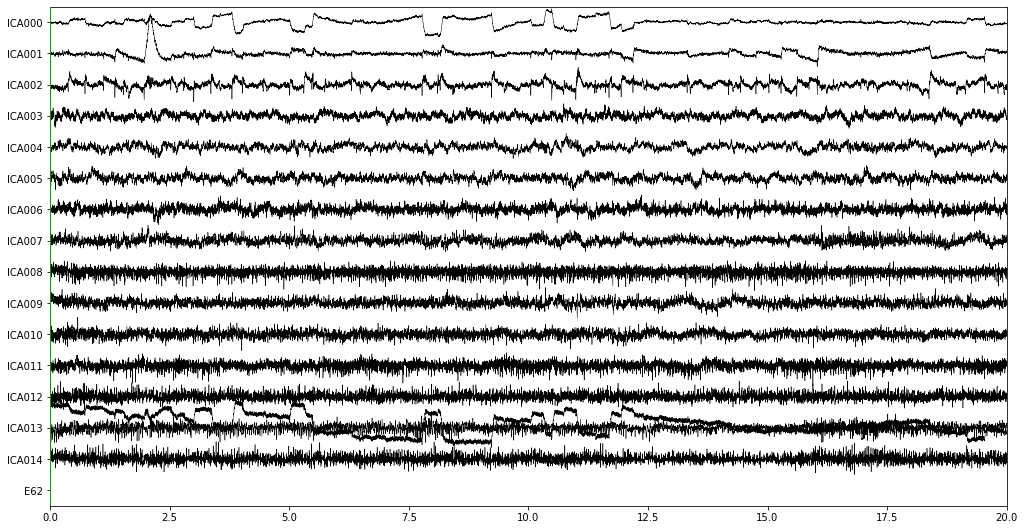

In [46]:
ica.plot_sources(minute_data, show_scrollbars=False)

In [52]:
ica.plot_components()

[<Figure size 702x508.68 with 15 Axes>]

In [48]:
eog_indices, eog_scores = ica.find_bads_eog(minute_data)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


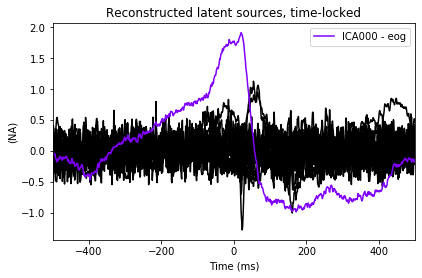

In [51]:
%matplotlib qt
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics
ica.plot_properties(minute_data, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(minute_data, show_scrollbars=False)

# plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
eog_evoked = eog_epochs.average()
ica.plot_sources(eog_evoked)

Reading EGI MFF Header from ../../raw_eeg/9.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 1344121  =      0.000 ...  1344.121 secs...
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method


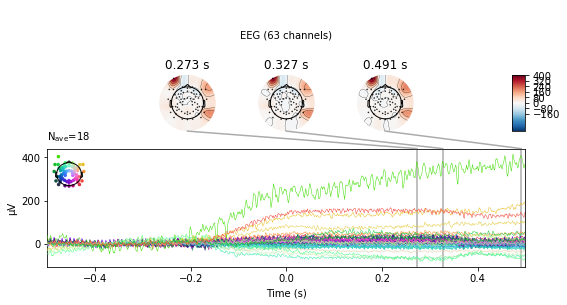

Reading EGI MFF Header from ../../raw_eeg/15.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 1000379  =      0.000 ...  1000.379 secs...
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method

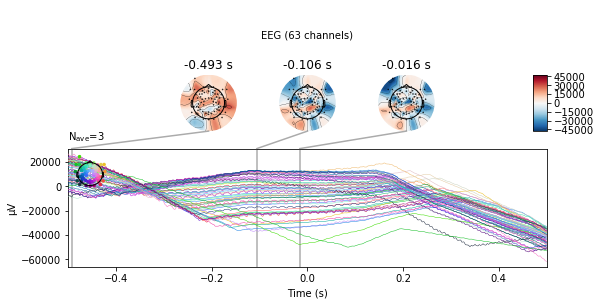

Reading EGI MFF Header from ../../raw_eeg/4.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {DIN1} ...
Reading 0 ... 1204718  =      0.000 ...  1204.718 secs...
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) met

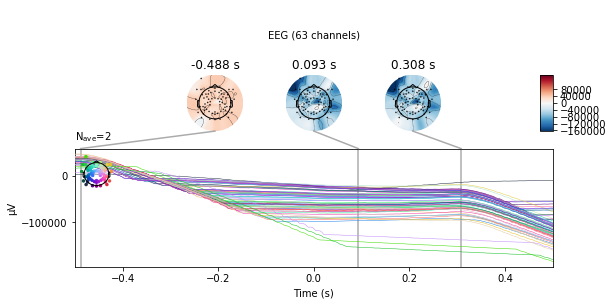

Reading EGI MFF Header from ../../raw_eeg/6.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 952598  =      0.000 ...   952.598 secs...


<ipython-input-36-eab380d6e820>:11: RuntimeWarning: Did not find any event code with more than one event.
  raw = mne.io.read_raw_egi(path, preload=True)


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)

<Info | 7 non-empty va

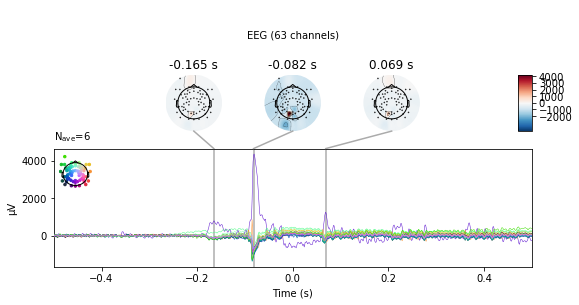

Reading EGI MFF Header from ../../raw_eeg/7.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 652821  =      0.000 ...   652.821 secs...


<ipython-input-36-eab380d6e820>:11: RuntimeWarning: Did not find any event code with more than one event.
  raw = mne.io.read_raw_egi(path, preload=True)


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)

<Info | 7 non-empty va

/Users/Qianqian/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Qianqian/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-36-eab380d6e820>:24: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  fig = eog_epochs.average().plot_joint()


ValueError: Some of the values  to be plotted are NaN.

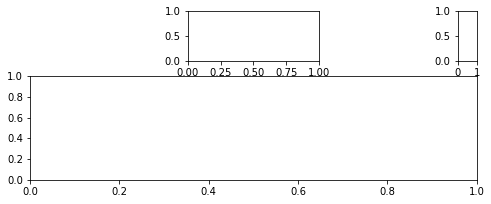

In [36]:
from os import listdir
from os.path import join
path_to_raw_eeg = '../../raw_eeg'
path_to_figures = './figures'

mffs = [join(path_to_raw_eeg, f) for f in listdir(path_to_raw_eeg) if f[-4:] == '.mff']

for path in mffs:
    pnum = path[len(path_to_raw_eeg)+1:-4] # string
    
    raw = mne.io.read_raw_egi(path, preload=True)
    raw.set_channel_types({'E62': 'eog'})
    raw.drop_channels('E65')
    
    # TODO: replace this with the correct crop timestamp
    trial_data = raw.copy()#.crop(540, 600)
    trial_data.notch_filter(60, filter_length='auto',phase='zero')
    trial_data.filter(0.1, None, picks=['eeg'])
    print(trial_data.info)
    
    # EOG artifact removal through ICA
    eog_epochs = mne.preprocessing.create_eog_epochs(trial_data, baseline=(-0.5, -0.2))

    fig = eog_epochs.average().plot_joint()
    fig.savefig(join(path_to_figures, 'eog', 'epoch_average_E62', 'p' + pnum + '.png'))

['../../raw_eeg/9.mff',
 '../../raw_eeg/15.mff',
 '../../raw_eeg/4.mff',
 '../../raw_eeg/2.mff']